In [1]:
#pip install pillow

In [2]:
#pip install --upgrade pillow

In [3]:
import numpy as np
import os
import time
#from keras_applications.resnet import ResNet50
from resnet50 import ResNet50
from keras.preprocessing import image
#from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten

#from keras import imagenet_utils
from tensorflow.keras.applications.resnet50 import decode_predictions, preprocess_input
#from imagenet_utils import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [4]:
# Loading the training data
#PATH = os.getcwd()
PATH = 'C://Users/Sahana/Desktop/cmpe257/Final/Resnet'
# Define data path
data_path = PATH + '/Classification'
data_dir_list = os.listdir(data_path)
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        img_path = data_path + '/'+ dataset + '/'+ img 
        img = Image.open(img_path)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        print('Input image shape:', x.shape)
        img_data_list.append(x)

img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

Loaded the images of dataset-Building

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 22

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Loaded the images of dataset-Wall

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 2

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
(484, 1, 224, 224, 3)
(1, 484, 224, 224, 3)
(484, 224, 224, 3)


In [5]:
'''#-- coding:utf-8 --
import cv2
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True
#PATH = os.getcwd()
# Define data path
PATH = 'C://Users/Sahana/Desktop/cmpe257/Final'
# Define data path
data_path = PATH + '/Classification'
#data_path = PATH + '/Classification'
data_dir_list = os.listdir(data_path)



img_rows=128
img_cols=128
num_channel=1
num_epoch=20

# Define the number of classes
num_classes = 2

img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    img_path = data_path + '/' + dataset  
    print(img_path)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        path = data_path + '/'+ dataset + '/'+ img
        input_img=cv2.imread(path)
        #print("@@@@@@@@ ", input_img)
        #print("##########", path)
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)
		
#%%'''

'#-- coding:utf-8 --\nimport cv2\nfrom PIL import ImageFile, Image\nImageFile.LOAD_TRUNCATED_IMAGES = True\n#PATH = os.getcwd()\n# Define data path\nPATH = \'C://Users/Sahana/Desktop/cmpe257/Final\'\n# Define data path\ndata_path = PATH + \'/Classification\'\n#data_path = PATH + \'/Classification\'\ndata_dir_list = os.listdir(data_path)\n\n\n\nimg_rows=128\nimg_cols=128\nnum_channel=1\nnum_epoch=20\n\n# Define the number of classes\nnum_classes = 2\n\nimg_data_list=[]\n\nfor dataset in data_dir_list:\n    img_list=os.listdir(data_path+\'/\'+ dataset)\n    img_path = data_path + \'/\' + dataset  \n    print(img_path)\n    print (\'Loaded the images of dataset-\'+\'{}\n\'.format(dataset))\n    for img in img_list:\n        path = data_path + \'/\'+ dataset + \'/\'+ img\n        input_img=cv2.imread(path)\n        #print("@@@@@@@@ ", input_img)\n        #print("##########", path)\n        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)\n        input_img_resize=cv2.resize(input_img,

In [6]:
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:250]=0
labels[251:]=1


names = ['Building', 'Wall']
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [7]:
# Custom_resnet_model_1
#Training the classifier alone
from resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten
image_input = Input(shape=(224, 224, 3))

model = ResNet50(input_tensor=image_input, include_top=False, weights='imagenet')
model.summary()
last_layer = model.get_layer('avg_pool').output
x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output_layer')(x)
custom_resnet_model = Model(inputs=image_input,outputs= out)
custom_resnet_model.summary()

W1203 15:17:38.963434 11940 deprecation_wrapper.py:119] From C:\Users\Sahana\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1203 15:17:44.047078 11940 deprecation_wrapper.py:119] From C:\Users\Sahana\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4074: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

                                                                 bn5a_branch1[0][0]               
__________________________________________________________________________________________________
activation_43 (Activation)      (None, 7, 7, 2048)   0           add_14[0][0]                     
__________________________________________________________________________________________________
res5b_branch2a (Conv2D)         (None, 7, 7, 512)    1049088     activation_43[0][0]              
__________________________________________________________________________________________________
bn5b_branch2a (BatchNormalizati (None, 7, 7, 512)    2048        res5b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_44 (Activation)      (None, 7, 7, 512)    0           bn5b_branch2a[0][0]              
__________________________________________________________________________________________________
res5b_bran

In [8]:
for layer in custom_resnet_model.layers[:-1]:
	layer.trainable = False

custom_resnet_model.layers[-1].trainable

custom_resnet_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_resnet_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

W1203 15:17:49.831048 11940 deprecation_wrapper.py:119] From C:\Users\Sahana\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 387 samples, validate on 97 samples
Epoch 1/12
387/387 [==============================] - 110s 284ms/step - loss: 0.5404 - accuracy: 0.7080 - val_loss: 0.5517 - val_accuracy: 0.7629
Epoch 2/12
387/387 [==============================] - 99s 255ms/step - loss: 0.3435 - accuracy: 0.8501 - val_loss: 0.5254 - val_accuracy: 0.8144
Epoch 3/12
387/387 [==============================] - 100s 258ms/step - loss: 0.3112 - accuracy: 0.8811 - val_loss: 0.5664 - val_accuracy: 0.7732
Epoch 4/12
387/387 [==============================] - 98s 254ms/step - loss: 0.2030 - accuracy: 0.9199 - val_loss: 0.5098 - val_accuracy: 0.8247
Epoch 5/12
387/387 [==============================] - 99s 255ms/step - loss: 0.1854 - accuracy: 0.9302 - val_loss: 0.6036 - val_accuracy: 0.7629
Epoch 6/12
387/387 [==============================] - 98s 253ms/step - loss: 0.2091 - accuracy: 0.9251 - val_loss: 0.4901 - val_accuracy: 0.8247
Epoch 7/12
387/387 [==============================] - 98s 253ms/step - loss: 0.1627

In [9]:
# Fine tune the resnet 50
#image_input = Input(shape=(224, 224, 3))
model = ResNet50(weights='imagenet',include_top=False)
model.summary()
last_layer = model.output
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu',name='fc-2')(x)
x = Dropout(0.5)(x)
# a softmax layer for 2 classes
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________________________________________

In [10]:
# this is the model we will train
custom_resnet_model2 = Model(inputs=model.input, outputs=out)

custom_resnet_model2.summary()

for layer in custom_resnet_model2.layers[:-6]:
	layer.trainable = False

custom_resnet_model2.layers[-1].trainable

custom_resnet_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_resnet_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_resnet_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
____________________________________________________________________________________________

Train on 387 samples, validate on 97 samples
Epoch 1/12
387/387 [==============================] - 112s 289ms/step - loss: 0.9370 - accuracy: 0.6848 - val_loss: 0.6211 - val_accuracy: 0.7732
Epoch 2/12
387/387 [==============================] - 102s 263ms/step - loss: 0.6774 - accuracy: 0.7623 - val_loss: 0.6305 - val_accuracy: 0.7938
Epoch 3/12
387/387 [==============================] - 99s 256ms/step - loss: 0.4782 - accuracy: 0.8243 - val_loss: 0.5648 - val_accuracy: 0.8144
Epoch 4/12
387/387 [==============================] - 99s 256ms/step - loss: 0.3934 - accuracy: 0.8605 - val_loss: 0.5372 - val_accuracy: 0.8454
Epoch 5/12
387/387 [==============================] - 99s 257ms/step - loss: 0.2953 - accuracy: 0.9044 - val_loss: 0.5818 - val_accuracy: 0.8041
Epoch 6/12
387/387 [==============================] - 100s 259ms/step - loss: 0.2553 - accuracy: 0.8915 - val_loss: 0.6206 - val_accuracy: 0.8041
Epoch 7/12
387/387 [==============================] - 99s 255ms/step - loss: 0.285

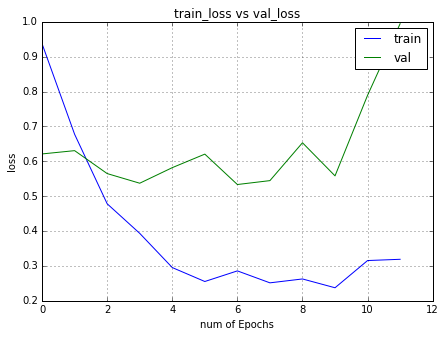

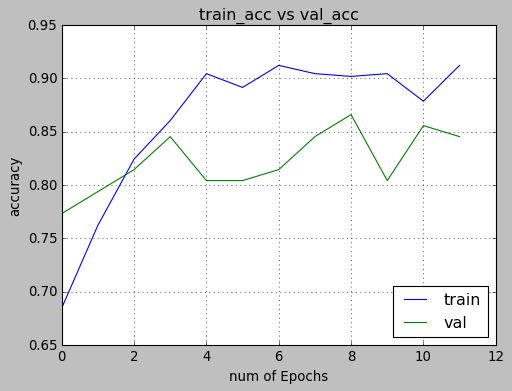

In [47]:
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(12)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [12]:
img_path = r'C:\Users\Sahana\Desktop\cmpe257\Final\Classification\Building\053H-Old-Gazette-Buildings-1-SUP-1-600x450.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

Input image shape: (1, 224, 224, 3)


C:\Users\Sahana\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


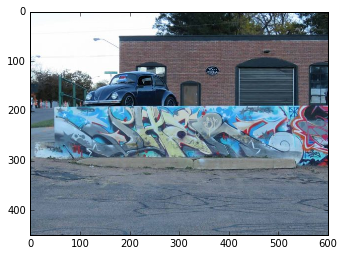

In [13]:
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
my_image = scipy.misc.imread(img_path)
imshow(my_image)

In [14]:
score = custom_resnet_model2.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])
print (x.shape)
x = X_test[0:1]


97/97 [==============================] - 23s 238ms/step
Test Loss: 0.9946107385084801
Test accuracy: 0.8453608155250549
(1, 224, 224, 3)


In [15]:
preds =custom_resnet_model2.predict(x)

In [19]:
print(preds)

[[[[0.07372417 0.23786941 0.64086944 ... 0.03879011 0.5297836
    0.24555722]]]]


In [20]:
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from imagenet_utils import decode_predictions

In [21]:
img_path = r'C:\Users\Sahana\Desktop\cmpe257\Final\Classification\Building\053H-Old-Gazette-Buildings-1-SUP-1-600x450.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

Input image shape: (1, 224, 224, 3)


In [22]:
preds =custom_resnet_model2.predict(x)

In [28]:
print(custom_resnet_model2.predict(x))

[[0.21374637 0.7862537 ]]


Graffiti is on Wall


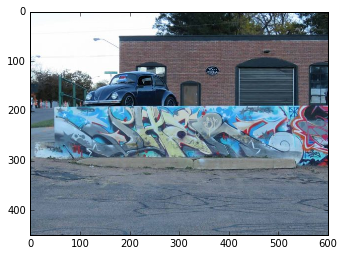

In [37]:
if custom_resnet_model2.predict(x)[0][1] > 0.5:
    print("Graffiti is on Wall")
else:
    print("Graffitit is on BUilding")
imshow(my_image)

In [42]:
img_path = r'C:\Users\Sahana\Desktop\cmpe257\Final\Classification\Building\images87.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

Input image shape: (1, 224, 224, 3)


In [43]:
preds =custom_resnet_model2.predict(x)

In [44]:
print(custom_resnet_model2.predict(x))

[[0.99894124 0.00105877]]


C:\Users\Sahana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


Graffiti is on Building


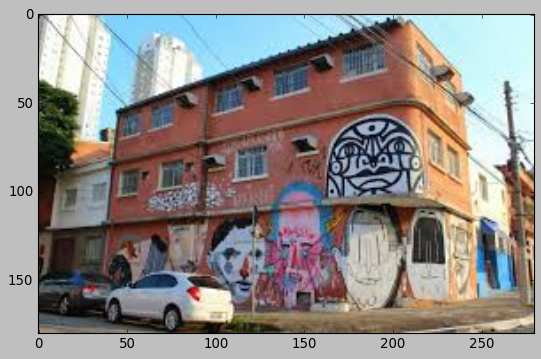

In [48]:
my_image = scipy.misc.imread(img_path)
imshow(my_image)

if custom_resnet_model2.predict(x)[0][1] > 0.5:
    print("Graffiti is on Wall")
else:
    print("Graffiti is on Building")

In [49]:
img_path = r'C:\Users\Sahana\Desktop\cmpe257\Final\Classification\Wall\09-Banksy.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

Input image shape: (1, 224, 224, 3)


In [50]:
preds =custom_resnet_model2.predict(x)

In [51]:
print(custom_resnet_model2.predict(x))

[[1.1273447e-04 9.9988723e-01]]


C:\Users\Sahana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


Graffiti is on Wall


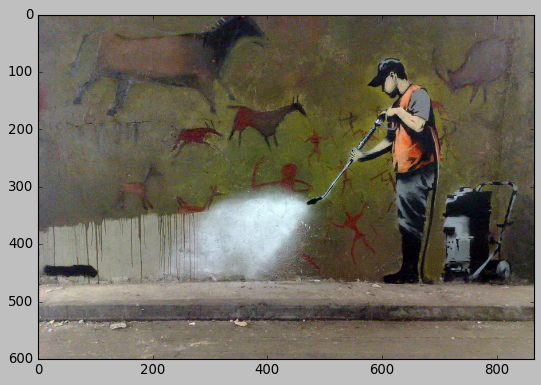

In [52]:
my_image = scipy.misc.imread(img_path)
imshow(my_image)

if custom_resnet_model2.predict(x)[0][1] > 0.5:
    print("Graffiti is on Wall")
else:
    print("Graffiti is on Building")

In [53]:
img_path = r'C:\Users\Sahana\Desktop\cmpe257\Final\Classification\Building\053H-Old-Gazette-Buildings-1-SUP-1-600x450.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

Input image shape: (1, 224, 224, 3)


In [54]:
preds =custom_resnet_model2.predict(x)

In [55]:
print(custom_resnet_model2.predict(x))

[[0.21374637 0.7862537 ]]


C:\Users\Sahana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


Graffiti is on Wall


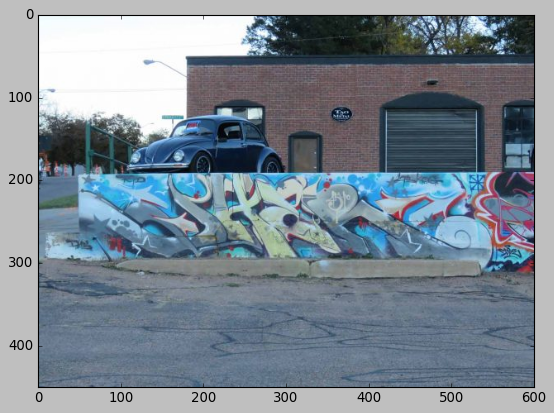

In [56]:
my_image = scipy.misc.imread(img_path)
imshow(my_image)

if custom_resnet_model2.predict(x)[0][1] > 0.5:
    print("Graffiti is on Wall")
else:
    print("Graffiti is on Building")